In [195]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plot
import seaborn as sea
import datetime as dt
import warnings

warnings.filterwarnings('ignore') 

In [196]:
# Loading the loan data and converting into dataframe
loan_df = pd.read_csv('loan.csv')

##  1. Data Cleaning

### 1.1 To check if there is any headers/footers or summary details rows are there and delete it.


In [197]:
# summay about the loan Data
print(loan_df.shape)
loan_df.head()

(39717, 111)


,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
4,1075358,1311748,3000,3000,3000.0,60 months,12.69%,67.79,B,B5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN


In [198]:
# We can see that there is no headers same for footers rows.
loan_df.tail()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
39712,92187,92174,2500,2500,1075.0,36 months,8.07%,78.42,A,A4,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
39713,90665,90607,8500,8500,875.0,36 months,10.28%,275.38,C,C1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
39714,90395,90390,5000,5000,1325.0,36 months,8.07%,156.84,A,A4,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
39715,90376,89243,5000,5000,650.0,36 months,7.43%,155.38,A,A2,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
39716,87023,86999,7500,7500,800.0,36 months,13.75%,255.43,E,E2,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [199]:
#no footers, Total, Subtotal rows row as well.
loan_df.shape


(39717, 111)

In [200]:
total_rows=len(loan_df)
total_rows

39717

In [201]:
#To check if there are unnecessasry rows in loan_status column.
loan_df['loan_status'].value_counts()

loan_status
Fully Paid     32950
Charged Off     5627
Current         1140
Name: count, dtype: int64

In [202]:
#Dropping the rows for loan_status=='Current' as the loans currently in progress and cannot contribute to EDA.
loan_df= loan_df[loan_df['loan_status']!='Current']
print("Total number of rows now:",len(loan_df)) ## Total no of rows now.

Total number of rows now: 38577


In [203]:
rows_deleted=((total_rows- len(loan_df))*100)/total_rows
print("% of rows deleted:",round(rows_deleted,2))

% of rows deleted: 2.87


In [204]:
# Checking for any duplicate rows.
duplicate_rows = len(loan_df[loan_df.duplicated()])
print("Count of duplicate rows:",round(duplicate_rows,2))


Count of duplicate rows: 0


### 1.2 Delete the Unnecessasry Columns.

In [205]:
loan_df.shape 

(38577, 111)

In [206]:
# To Check the details of columns if they are nulls or blanks as value.
(loan_df.isnull().sum()*100)/len(loan_df)
#100% indiactes columns having all values as null or na so they can be removed from analysis

id                              0.000000
member_id                       0.000000
loan_amnt                       0.000000
funded_amnt                     0.000000
funded_amnt_inv                 0.000000
                                 ...    
tax_liens                       0.101097
tot_hi_cred_lim               100.000000
total_bal_ex_mort             100.000000
total_bc_limit                100.000000
total_il_high_credit_limit    100.000000
Length: 111, dtype: float64

In [207]:
print("Total columns with values NA: ", len(loan_df.columns[loan_df.isna().all()].tolist()))
na_columns=list(loan_df.columns[loan_df.isna().all()])
print("NA columns List:")
na_columns

Total columns with values NA:  55
NA columns List:


['next_pymnt_d',
 'mths_since_last_major_derog',
 'annual_inc_joint',
 'dti_joint',
 'verification_status_joint',
 'tot_coll_amt',
 'tot_cur_bal',
 'open_acc_6m',
 'open_il_6m',
 'open_il_12m',
 'open_il_24m',
 'mths_since_rcnt_il',
 'total_bal_il',
 'il_util',
 'open_rv_12m',
 'open_rv_24m',
 'max_bal_bc',
 'all_util',
 'total_rev_hi_lim',
 'inq_fi',
 'total_cu_tl',
 'inq_last_12m',
 'acc_open_past_24mths',
 'avg_cur_bal',
 'bc_open_to_buy',
 'bc_util',
 'mo_sin_old_il_acct',
 'mo_sin_old_rev_tl_op',
 'mo_sin_rcnt_rev_tl_op',
 'mo_sin_rcnt_tl',
 'mort_acc',
 'mths_since_recent_bc',
 'mths_since_recent_bc_dlq',
 'mths_since_recent_inq',
 'mths_since_recent_revol_delinq',
 'num_accts_ever_120_pd',
 'num_actv_bc_tl',
 'num_actv_rev_tl',
 'num_bc_sats',
 'num_bc_tl',
 'num_il_tl',
 'num_op_rev_tl',
 'num_rev_accts',
 'num_rev_tl_bal_gt_0',
 'num_sats',
 'num_tl_120dpd_2m',
 'num_tl_30dpd',
 'num_tl_90g_dpd_24m',
 'num_tl_op_past_12m',
 'pct_tl_nvr_dlq',
 'percent_bc_gt_75',
 'tot_hi_cred_

In [208]:
# Deleting the columns which is having all rows values as na.
loan_df = loan_df.dropna(axis=1, how="all")
loan_df

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,last_pymnt_amnt,last_credit_pull_d,collections_12_mths_ex_med,policy_code,application_type,acc_now_delinq,chargeoff_within_12_mths,delinq_amnt,pub_rec_bankruptcies,tax_liens
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,...,171.62,May-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,...,119.66,Sep-13,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,...,649.91,May-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,...,357.48,Apr-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
5,1075269,1311441,5000,5000,5000.0,36 months,7.90%,156.46,A,A4,...,161.03,Jan-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39712,92187,92174,2500,2500,1075.0,36 months,8.07%,78.42,A,A4,...,80.90,Jun-10,NaN,1,INDIVIDUAL,0,NaN,0,NaN,NaN
39713,90665,90607,8500,8500,875.0,36 months,10.28%,275.38,C,C1,...,281.94,Jul-10,NaN,1,INDIVIDUAL,0,NaN,0,NaN,NaN
39714,90395,90390,5000,5000,1325.0,36 months,8.07%,156.84,A,A4,...,0.00,Jun-07,NaN,1,INDIVIDUAL,0,NaN,0,NaN,NaN
39715,90376,89243,5000,5000,650.0,36 months,7.43%,155.38,A,A2,...,0.00,Jun-07,NaN,1,INDIVIDUAL,0,NaN,0,NaN,NaN


In [209]:
# Deleting the rows which is having all columns values as na.
loan_df = loan_df.dropna(axis=0, how="all")
loan_df

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,last_pymnt_amnt,last_credit_pull_d,collections_12_mths_ex_med,policy_code,application_type,acc_now_delinq,chargeoff_within_12_mths,delinq_amnt,pub_rec_bankruptcies,tax_liens
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,...,171.62,May-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,...,119.66,Sep-13,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,...,649.91,May-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,...,357.48,Apr-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
5,1075269,1311441,5000,5000,5000.0,36 months,7.90%,156.46,A,A4,...,161.03,Jan-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39712,92187,92174,2500,2500,1075.0,36 months,8.07%,78.42,A,A4,...,80.90,Jun-10,NaN,1,INDIVIDUAL,0,NaN,0,NaN,NaN
39713,90665,90607,8500,8500,875.0,36 months,10.28%,275.38,C,C1,...,281.94,Jul-10,NaN,1,INDIVIDUAL,0,NaN,0,NaN,NaN
39714,90395,90390,5000,5000,1325.0,36 months,8.07%,156.84,A,A4,...,0.00,Jun-07,NaN,1,INDIVIDUAL,0,NaN,0,NaN,NaN
39715,90376,89243,5000,5000,650.0,36 months,7.43%,155.38,A,A2,...,0.00,Jun-07,NaN,1,INDIVIDUAL,0,NaN,0,NaN,NaN


In [210]:
#delete all the columns where all values are unique in nature because they can't help in generating relations
unique_columns=[]
for col in loan_df.columns:
    if(loan_df[col].nunique()==len(loan_df)):
        unique_columns.append(col)
unique_columns

['id', 'member_id', 'url']

In [211]:
# We will delete'member_id', and 'url' as it doesn't count in EDA. Will keep the id columns which will be used for creating piviot table
loan_df.drop(['url','member_id'],axis=1, inplace=True)


In [212]:
loan_df.shape

(38577, 54)

In [213]:
# Lets delete the column which is having text/description values as they don't donctribute to EDA.
loan_df.drop(['desc','title'],axis=1,inplace=True)

In [214]:
# We will limit our analysis till Group level only. Hence deleting the subgroups.
loan_df = loan_df.drop(['sub_grade'],  axis=1)
loan_df.shape

(38577, 51)

In [215]:
#Behavioural data is captured post loan approval and will not be available during the loan approval process. Hence removing these fields.
no_part_cols=['delinq_2yrs', 'earliest_cr_line', 'last_pymnt_amnt','inq_last_6mths', 'open_acc', 'pub_rec', 'revol_bal', 'revol_util', 'total_acc',
                          'out_prncp', 'out_prncp_inv', 'total_pymnt','total_pymnt_inv', 'total_rec_prncp',
                          'total_rec_int', 'total_rec_late_fee', 'recoveries', 'collection_recovery_fee',
                        'application_type','last_pymnt_d','last_credit_pull_d']

loan_df=loan_df.drop(no_part_cols,axis=1)
loan_df.shape

(38577, 30)

In [216]:
loan_df.nunique().sort_values()

tax_liens                         1
delinq_amnt                       1
chargeoff_within_12_mths          1
acc_now_delinq                    1
policy_code                       1
collections_12_mths_ex_med        1
initial_list_status               1
pymnt_plan                        1
loan_status                       2
term                              2
verification_status               3
pub_rec_bankruptcies              3
home_ownership                    5
grade                             7
emp_length                       11
purpose                          14
addr_state                       50
issue_d                          55
mths_since_last_delinq           95
mths_since_last_record          111
int_rate                        370
zip_code                        822
loan_amnt                       870
funded_amnt                    1019
dti                            2853
annual_inc                     5215
funded_amnt_inv                8050
installment                 

In [217]:
# Example most of the columns values is 1.Deletting them as well.
for column in loan_df.columns:
    if loan_df[column].nunique(dropna=True) == 1:
        print(column)
        loan_df = loan_df.drop(column, axis=1)
print("-------------")
loan_df

pymnt_plan
initial_list_status
collections_12_mths_ex_med
policy_code
acc_now_delinq
chargeoff_within_12_mths
delinq_amnt
tax_liens
-------------


,id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,emp_title,emp_length,...,verification_status,issue_d,loan_status,purpose,zip_code,addr_state,dti,mths_since_last_delinq,mths_since_last_record,pub_rec_bankruptcies
0,1077501,5000,5000,4975.0,36 months,10.65%,162.87,B,NaN,10+ years,...,Verified,Dec-11,Fully Paid,credit_card,860xx,AZ,27.65,NaN,NaN,0.0
1,1077430,2500,2500,2500.0,60 months,15.27%,59.83,C,Ryder,< 1 year,...,Source Verified,Dec-11,Charged Off,car,309xx,GA,1.00,NaN,NaN,0.0
2,1077175,2400,2400,2400.0,36 months,15.96%,84.33,C,NaN,10+ years,...,Not Verified,Dec-11,Fully Paid,small_business,606xx,IL,8.72,NaN,NaN,0.0
3,1076863,10000,10000,10000.0,36 months,13.49%,339.31,C,AIR RESOURCES BOARD,10+ years,...,Source Verified,Dec-11,Fully Paid,other,917xx,CA,20.00,35.0,NaN,0.0
5,1075269,5000,5000,5000.0,36 months,7.90%,156.46,A,Veolia Transportaton,3 years,...,Source Verified,Dec-11,Fully Paid,wedding,852xx,AZ,11.20,NaN,NaN,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39712,92187,2500,2500,1075.0,36 months,8.07%,78.42,A,FiSite Research,4 years,...,Not Verified,Jul-07,Fully Paid,home_improvement,802xx,CO,11.33,0.0,0.0,NaN
39713,90665,8500,8500,875.0,36 months,10.28%,275.38,C,"Squarewave Solutions, Ltd.",3 years,...,Not Verified,Jul-07,Fully Paid,credit_card,274xx,NC,6.40,5.0,0.0,NaN
39714,90395,5000,5000,1325.0,36 months,8.07%,156.84,A,NaN,< 1 year,...,Not Verified,Jul-07,Fully Paid,debt_consolidation,017xx,MA,2.30,0.0,0.0,NaN
39715,90376,5000,5000,650.0,36 months,7.43%,155.38,A,NaN,< 1 year,...,Not Verified,Jul-07,Fully Paid,other,208xx,MD,3.72,0.0,0.0,NaN


In [218]:
#Dropping the columns which is having more than 50% of value is null.
#total_rows = len(loan_df)
for col in loan_df.columns:
    if loan_df[col].isna().mean().round(2) >= 0.50:
        print(col)
        loan_df = loan_df.drop(col, axis=1)
loan_df.shape

mths_since_last_delinq
mths_since_last_record


(38577, 20)

In [219]:
#Deleting emp_title as its description or textual informations and doesn't participate in EDA analysis.
loan_df=loan_df.drop(['emp_title'], axis=1)


##  2. Data Conversion

In [220]:
loan_df.dtypes


id                        int64
loan_amnt                 int64
funded_amnt               int64
funded_amnt_inv         float64
term                     object
int_rate                 object
installment             float64
grade                    object
emp_length               object
home_ownership           object
annual_inc              float64
verification_status      object
issue_d                  object
loan_status              object
purpose                  object
zip_code                 object
addr_state               object
dti                     float64
pub_rec_bankruptcies    float64
dtype: object

In [221]:
loan_df['term'].value_counts()

term
36 months    29096
60 months     9481
Name: count, dtype: int64

In [222]:

#loan_df['term'] = loan_df['term'].apply(clean_term)
loan_df['term'] = loan_df['term'].str.strip().str.split().str[0].astype('int64') # removing the string parts of int value

In [223]:
loan_df['term'].value_counts()

term
36    29096
60     9481
Name: count, dtype: int64

In [224]:
loan_df['int_rate'].value_counts()

int_rate
10.99%    913
11.49%    790
7.51%     787
13.49%    749
7.88%     725
         ... 
16.96%      1
18.36%      1
16.15%      1
16.01%      1
16.20%      1
Name: count, Length: 370, dtype: int64

In [225]:
# Convert int_rate fromns string to float.
loan_df['int_rate']=loan_df['int_rate'].str.strip('%').astype(float)


In [226]:
loan_df['int_rate'].value_counts()

int_rate
10.99    913
11.49    790
7.51     787
13.49    749
7.88     725
        ... 
16.96      1
18.36      1
16.15      1
16.01      1
16.20      1
Name: count, Length: 370, dtype: int64

In [227]:
# Convert the column loan_funded_amnt and funded_amnt as flot64
loan_df = loan_df.astype({'loan_amnt':'float','funded_amnt':'float'})
loan_df

,id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,purpose,zip_code,addr_state,dti,pub_rec_bankruptcies
0,1077501,5000.0,5000.0,4975.0,36,10.65,162.87,B,10+ years,RENT,24000.0,Verified,Dec-11,Fully Paid,credit_card,860xx,AZ,27.65,0.0
1,1077430,2500.0,2500.0,2500.0,60,15.27,59.83,C,< 1 year,RENT,30000.0,Source Verified,Dec-11,Charged Off,car,309xx,GA,1.00,0.0
2,1077175,2400.0,2400.0,2400.0,36,15.96,84.33,C,10+ years,RENT,12252.0,Not Verified,Dec-11,Fully Paid,small_business,606xx,IL,8.72,0.0
3,1076863,10000.0,10000.0,10000.0,36,13.49,339.31,C,10+ years,RENT,49200.0,Source Verified,Dec-11,Fully Paid,other,917xx,CA,20.00,0.0
5,1075269,5000.0,5000.0,5000.0,36,7.90,156.46,A,3 years,RENT,36000.0,Source Verified,Dec-11,Fully Paid,wedding,852xx,AZ,11.20,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39712,92187,2500.0,2500.0,1075.0,36,8.07,78.42,A,4 years,MORTGAGE,110000.0,Not Verified,Jul-07,Fully Paid,home_improvement,802xx,CO,11.33,NaN
39713,90665,8500.0,8500.0,875.0,36,10.28,275.38,C,3 years,RENT,18000.0,Not Verified,Jul-07,Fully Paid,credit_card,274xx,NC,6.40,NaN
39714,90395,5000.0,5000.0,1325.0,36,8.07,156.84,A,< 1 year,MORTGAGE,100000.0,Not Verified,Jul-07,Fully Paid,debt_consolidation,017xx,MA,2.30,NaN
39715,90376,5000.0,5000.0,650.0,36,7.43,155.38,A,< 1 year,MORTGAGE,200000.0,Not Verified,Jul-07,Fully Paid,other,208xx,MD,3.72,NaN


In [228]:
# check grade dattype.
loan_df['grade'].value_counts()

grade
B    11675
A    10045
C     7834
D     5085
E     2663
F      976
G      299
Name: count, dtype: int64

In [229]:
loan_df['emp_length'].value_counts()

emp_length
10+ years    8488
< 1 year     4508
2 years      4291
3 years      4012
4 years      3342
5 years      3194
1 year       3169
6 years      2168
7 years      1711
8 years      1435
9 years      1226
Name: count, dtype: int64

In [230]:
# Rounding off the belows to two decimals points. #vectorized operation
loan_df[['loan_amnt', 'funded_amnt', 'funded_amnt_inv', 'int_rate', 'dti']] = loan_df[['loan_amnt', 'funded_amnt', 'funded_amnt_inv', 'int_rate', 'dti']].round(2)

In [231]:
#converting issue_d`to date type
loan_df['issue_d'] = pd.to_datetime(loan_df['issue_d'], format='%b-%y')
loan_df['issue_d']

0       2011-12-01
1       2011-12-01
2       2011-12-01
3       2011-12-01
5       2011-12-01
           ...    
39712   2007-07-01
39713   2007-07-01
39714   2007-07-01
39715   2007-07-01
39716   2007-06-01
Name: issue_d, Length: 38577, dtype: datetime64[ns]

In [232]:
(loan_df.isnull().sum()*100)/len(loan_df)

id                      0.000000
loan_amnt               0.000000
funded_amnt             0.000000
funded_amnt_inv         0.000000
term                    0.000000
int_rate                0.000000
installment             0.000000
grade                   0.000000
emp_length              2.677761
home_ownership          0.000000
annual_inc              0.000000
verification_status     0.000000
issue_d                 0.000000
loan_status             0.000000
purpose                 0.000000
zip_code                0.000000
addr_state              0.000000
dti                     0.000000
pub_rec_bankruptcies    1.806776
dtype: float64

## 3. Dropping/ Imputing the rows.


In [233]:
# Dropping the null rows for emp_length and pub_rec_bankruptcies columns as number of null rows are very less.
prev_rows=len(loan_df)
prev_rows

38577

In [234]:
loan_df= loan_df[loan_df['emp_length'].notna()]
loan_df= loan_df[loan_df['pub_rec_bankruptcies'].notna()]

In [235]:
after_rows=len(loan_df)
total_deleted=((prev_rows-after_rows)*100)/prev_rows
print("Total % of rows deleted:",round(total_deleted,2))
print(loan_df.shape)

Total % of rows deleted: 4.48
(36847, 19)


In [236]:
(loan_df.isnull().sum()*100)/len(loan_df) # so no na any mmore

id                      0.0
loan_amnt               0.0
funded_amnt             0.0
funded_amnt_inv         0.0
term                    0.0
int_rate                0.0
installment             0.0
grade                   0.0
emp_length              0.0
home_ownership          0.0
annual_inc              0.0
verification_status     0.0
issue_d                 0.0
loan_status             0.0
purpose                 0.0
zip_code                0.0
addr_state              0.0
dti                     0.0
pub_rec_bankruptcies    0.0
dtype: float64

In [237]:
#vectorisation used to strip string values
loan_df['emp_length']=loan_df['emp_length'].str.strip('years').str.strip('<').str.replace(" ","").str.replace("+","")


In [304]:
print(loan_df['emp_length'])

0        10
1         1
2        10
3        10
5         3
         ..
39562     1
39573     3
39623     8
39666     2
39680     2
Name: emp_length, Length: 33272, dtype: object


## 4. Derived Columns

In [239]:
# Creating a dervied columns for issue month and issue year from issues date
loan_df['issue_year']=pd.DatetimeIndex(loan_df['issue_d']).year
loan_df['issue_month']=pd.DatetimeIndex(loan_df['issue_d']).month

## 5. Univariate Analysis

In [241]:
#Bucketing different varaibles for better analysis

In [242]:
# Bucketting Loan Amount
def bucket_loan_amnt(column):
    if column <= 5000:
        return '0 - 5K'  # 25% quartile
    elif (column >5000) and (column <= 10000):
        return '5K - 10K'
    elif (column >10000) and (column <= 15000):
        return '10K - 15K'
    else:
        return '15K - above' # 75% quartile

loan_df['loan_amnt_b'] = loan_df.apply(lambda x : bucket_loan_amnt(x.loan_amnt), axis = 1)

In [243]:
#Bucketing Annual Income
def bucket_annual_inc(column):
    if column <= 40000:
        return '0 - 40k' # 25% quartile
    elif (column >40000) and (column <= 50000):
        return '40k - 50k'
    elif (column >50000) and (column <= 60000):
        return '50k to 60k'
    elif (column >60000) and (column <= 70000):
        return '60k to 70k'
    elif (column >70000) and (column <= 80000):
        return '70k to 80k'
    else:
        return '80k - above' # 75% quartile

loan_df['annual_inc_b'] = loan_df.apply(lambda x: bucket_annual_inc(x.annual_inc), axis = 1)

In [244]:
# Bucketing interest rate
def bucket_int_rate(column):
    if column <= 9:
        return 'Very Low' # 25% quartile
    elif (column >9) and (column <= 11):
        return 'Low'
    elif (column >11) and (column <= 13):
        return 'Moderate'
    elif (column >13) and (column <= 15):
        return 'High'
    else:
        return 'Very High' # 75% quartile

loan_df['int_rate_b'] = loan_df.apply(lambda x : bucket_int_rate(x.int_rate), axis = 1)

In [245]:
# Bucketing dti
def bucket_dti(column):
    if column <= 8:
        return 'Very Low' # 25% quartile
    elif (column >8) and (column <= 12):
        return 'Low'
    elif (column >12) and (column <= 16):
        return 'Moderate'
    elif (column >16) and (column <= 20):
        return 'High'
    else:
        return 'Very High' # 75% quartile

loan_df['dti_b'] = loan_df.apply(lambda x : bucket_dti(x.dti), axis = 1)

In [246]:
# Univarients function
def plot_diagram(df, column):
    fig, p = plot.subplots(1,2, figsize=(16, 4))
    sea.distplot(df.loc[df[column].notnull(), column], kde=True, hist=True, ax=p[0])
    sea.boxplot(x=column, data=df, ax=p[1])
    p[0].set_xlabel(column_titles[column])
    p[1].set_xlabel(column_titles[column])
    plot.tight_layout()
    plot.show()

count    36847.000000
mean     11141.327652
std       7369.988994
min        500.000000
25%       5500.000000
50%      10000.000000
75%      15000.000000
max      35000.000000
Name: loan_amnt, dtype: float64


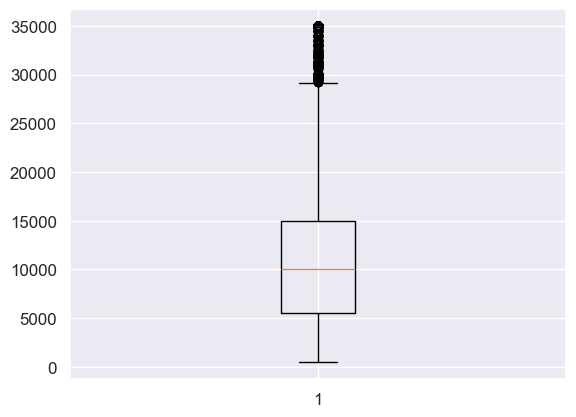

In [247]:
plot.boxplot(loan_df['loan_amnt'])
print(loan_df['loan_amnt'].describe())
plot.show()


count    36847.000000
mean     10872.924526
std       7109.330771
min        500.000000
25%       5400.000000
50%       9600.000000
75%      15000.000000
max      35000.000000
Name: funded_amnt, dtype: float64


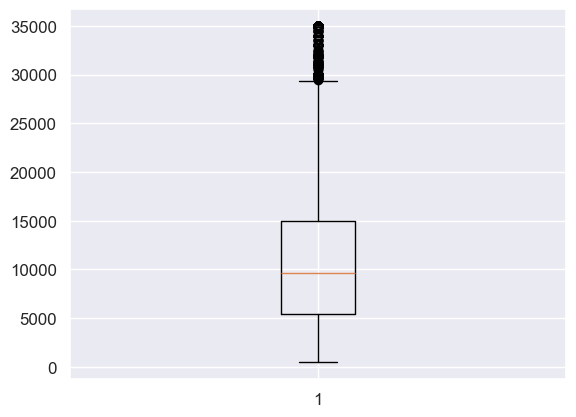

In [248]:
plot.boxplot(loan_df['funded_amnt'])
print(loan_df['funded_amnt'].describe())
plot.show()
#very similar to loan amount boxplot

count    3.684700e+04
mean     6.940448e+04
std      6.402747e+04
min      4.000000e+03
25%      4.100400e+04
50%      6.000000e+04
75%      8.300000e+04
max      6.000000e+06
Name: annual_inc, dtype: float64


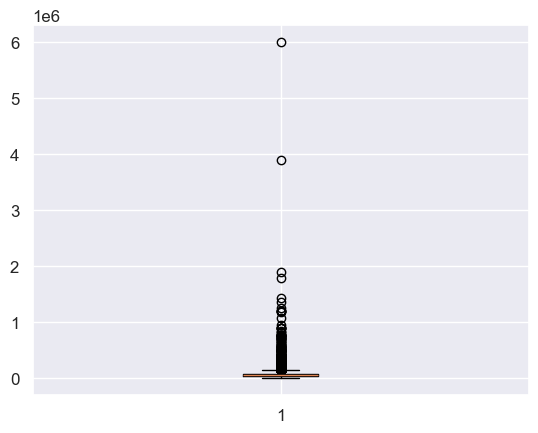

In [249]:
plot.boxplot(loan_df['annual_inc'])
print(loan_df['annual_inc'].describe())
plot.show()

count    36847.000000
mean        11.988346
std          3.702091
min          5.420000
25%          8.940000
50%         11.860000
75%         14.520000
max         24.400000
Name: int_rate, dtype: float64


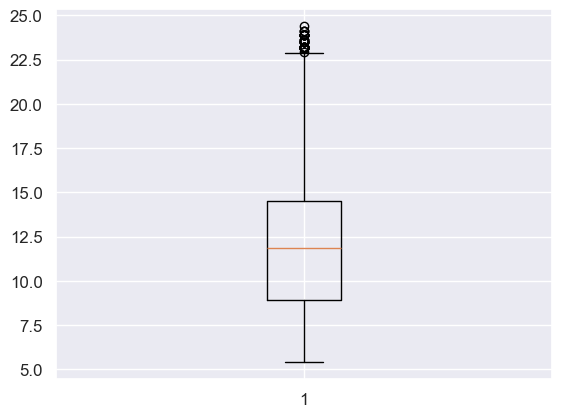

In [250]:
plot.boxplot(loan_df['int_rate'])
print(loan_df['int_rate'].describe())
plot.show()

count    36847.000000
mean        13.330449
std          6.651565
min          0.000000
25%          8.210000
50%         13.420000
75%         18.590000
max         29.990000
Name: dti, dtype: float64


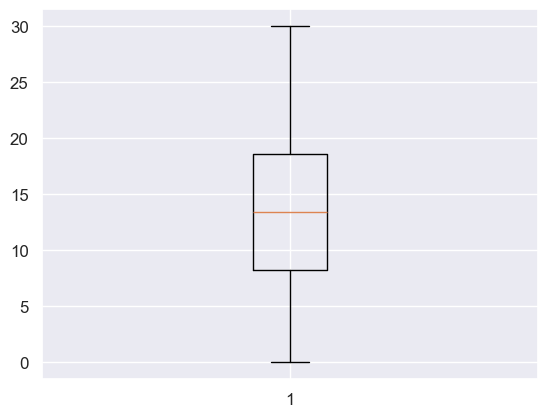

In [251]:
plot.boxplot(loan_df['dti'])
print(loan_df['dti'].describe())
plot.show()

count    36847.000000
mean       324.694599
std        208.886154
min         16.080000
25%        167.565000
50%        280.000000
75%        428.975000
max       1305.190000
Name: installment, dtype: float64


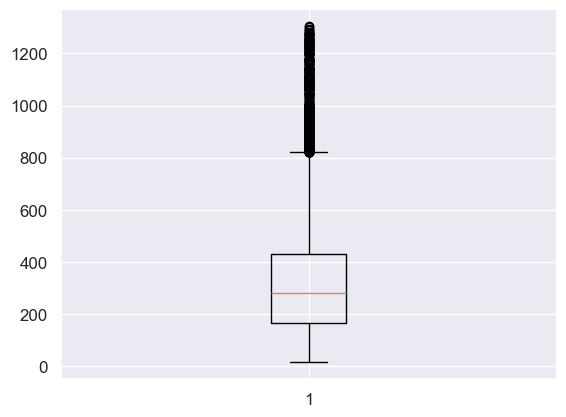

In [252]:
plot.boxplot(loan_df['installment'])
print(loan_df['installment'].describe())
plot.show()

In [253]:
# From above box plts we can see there is otliers exits for columns'loan_amnt', 'funded_amnt', 'funded_amnt_inv', 'int_rate', 'installment', 'annual_inc'.
# remove the outlier
outliers_columns_set1= ['loan_amnt', 'funded_amnt']
outliers_columns_set2=['int_rate', 'installment', 'annual_inc']
# Define a function to remove outliers based on IQR
def remove_outliers_iqr(data, columns,threshold):
    for col in columns:
        Q1 = data[col].quantile(0.25)
        Q3 = data[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - threshold * IQR
        upper_bound = Q3 + threshold * IQR
        data = data[(data[col] >= lower_bound) & (data[col] <= upper_bound)]
    return data

# Remove outliers from the DataFrame
loan_df =remove_outliers_iqr(loan_df, outliers_columns_set1,1.5)
loan_df =remove_outliers_iqr(loan_df, outliers_columns_set2,1.5)



count    33272.000000
mean      9863.045504
std       5865.704869
min        500.000000
25%       5000.000000
50%       9000.000000
75%      14000.000000
max      29000.000000
Name: loan_amnt, dtype: float64


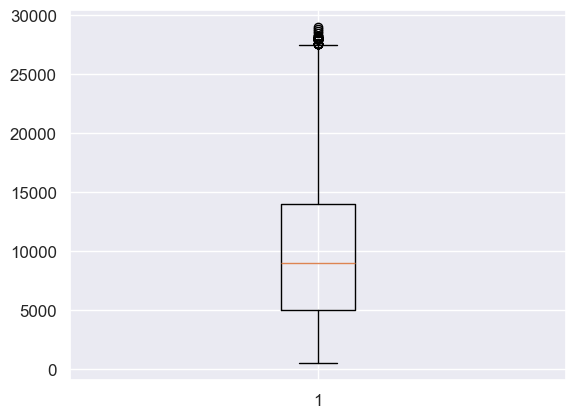

In [254]:
plot.boxplot(loan_df['loan_amnt'])
print(loan_df['loan_amnt'].describe())
plot.show()

count    33272.000000
mean      9636.585567
std       5626.424241
min        500.000000
25%       5000.000000
50%       8550.000000
75%      13000.000000
max      28200.000000
Name: funded_amnt, dtype: float64


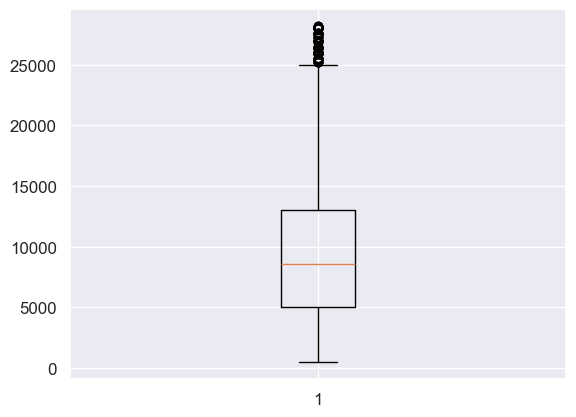

In [255]:
plot.boxplot(loan_df['funded_amnt'])
print(loan_df['funded_amnt'].describe())
plot.show()

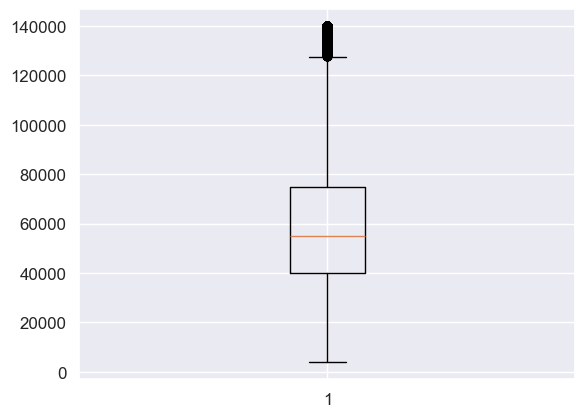

In [256]:
plot.boxplot(loan_df['annual_inc'])
plot.show()

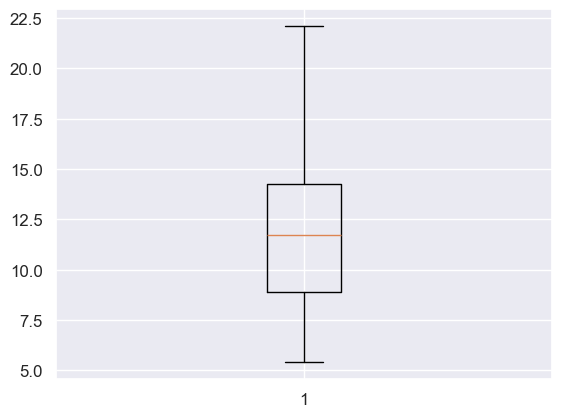

In [257]:
plot.boxplot(loan_df['int_rate'])
plot.show()

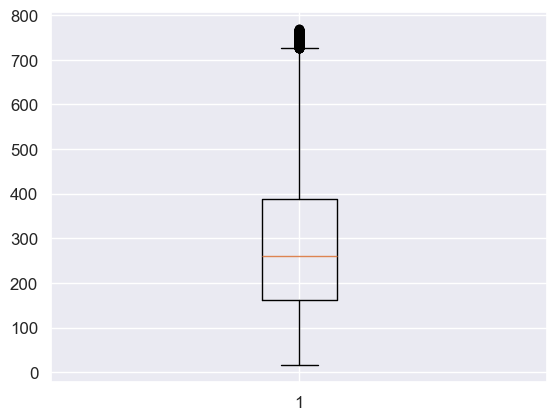

In [258]:
plot.boxplot(loan_df['installment'])
plot.show()

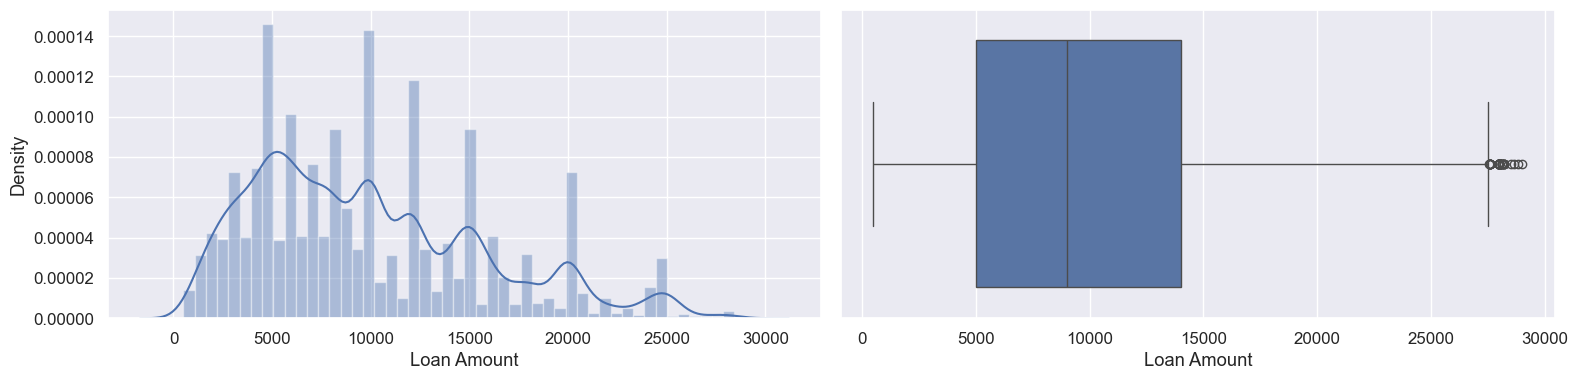

count    33272.000000
mean      9863.045504
std       5865.704869
min        500.000000
25%       5000.000000
50%       9000.000000
75%      14000.000000
max      29000.000000
Name: loan_amnt, dtype: float64

In [259]:
plot_diagram(loan_df, 'loan_amnt')
#print(loan_df["loan_amnt"].mean())
# describe the Loan Amount
loan_df['loan_amnt'].describe()

In [260]:
# observation:
# Most of the loan amount applied was in the range of 5k-14k.
# Max Loan amount applied was ~27k.

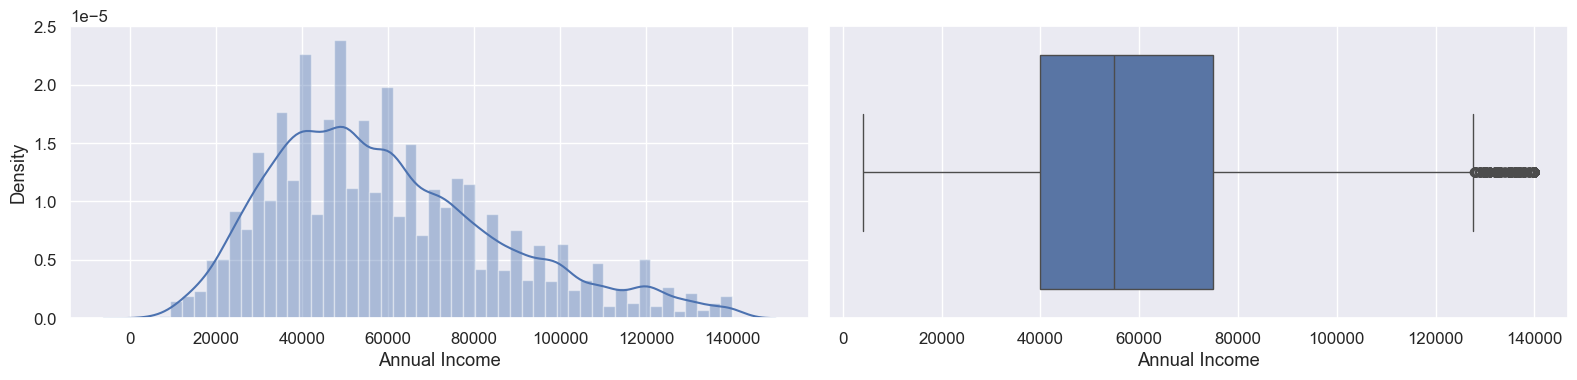

count     33272.000000
mean      59942.400711
std       26936.491344
min        4000.000000
25%       40000.000000
50%       55000.000000
75%       75000.000000
max      140000.000000
Name: annual_inc, dtype: float64

In [261]:
plot_diagram(loan_df, 'annual_inc')
#print(loan_df["loan_amnt"].mean())
# describe the annual income details
loan_df['annual_inc'].describe()

In [262]:
# The Annual income of most if applicants lies between 40k-75k.
print("Average Anual Income is :", round(loan_df['annual_inc'].mean(),0))

Average Anual Income is : 59942.0


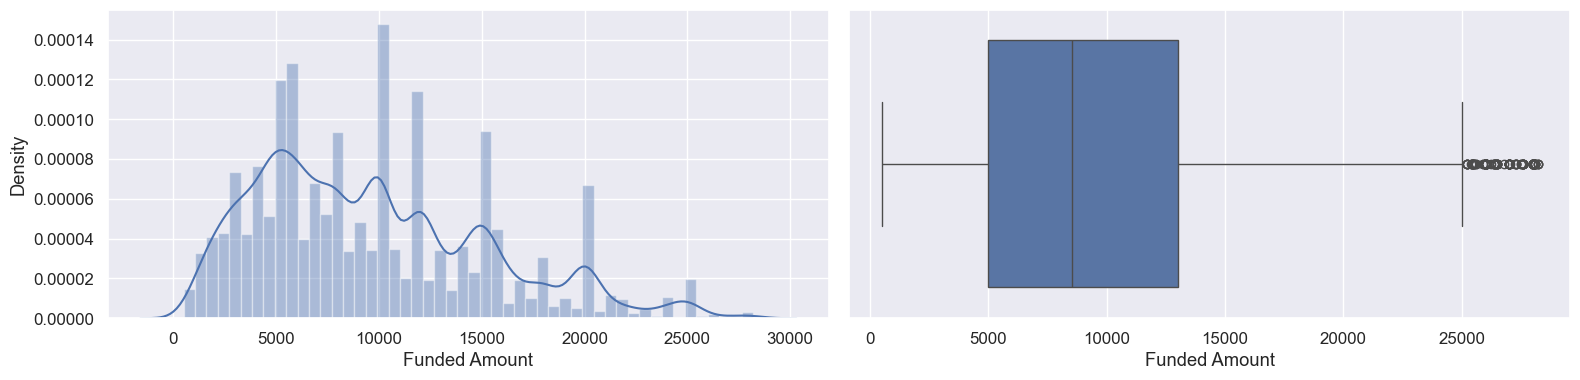

count    33272.000000
mean      9636.585567
std       5626.424241
min        500.000000
25%       5000.000000
50%       8550.000000
75%      13000.000000
max      28200.000000
Name: funded_amnt, dtype: float64

In [263]:
plot_diagram(loan_df, 'funded_amnt')
loan_df['funded_amnt'].describe()

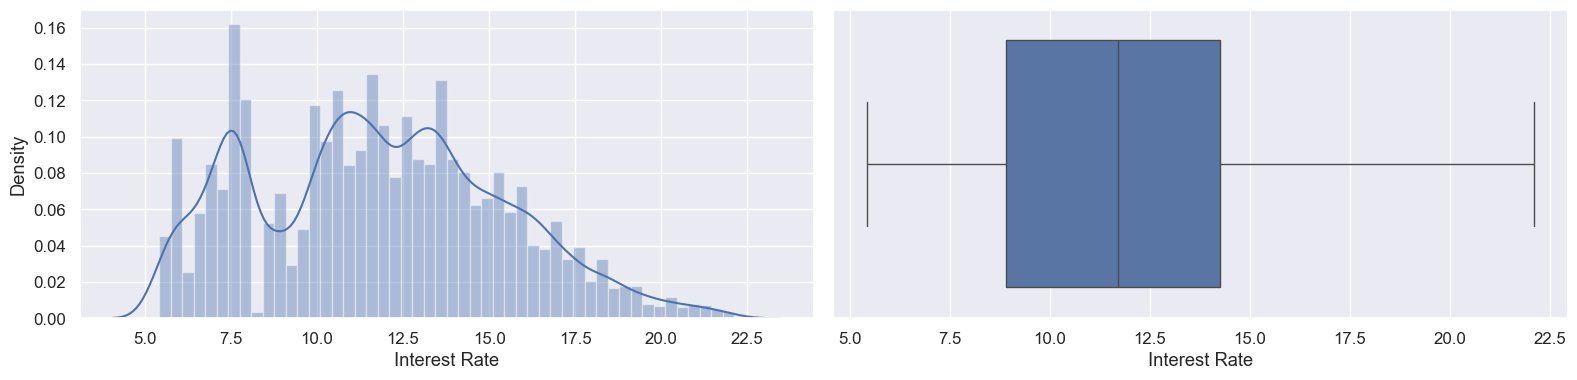

count    33272.000000
mean        11.791514
std          3.596809
min          5.420000
25%          8.900000
50%         11.710000
75%         14.260000
max         22.110000
Name: int_rate, dtype: float64

In [264]:
plot_diagram(loan_df, 'int_rate')
loan_df['int_rate'].describe()

In [265]:
# Most of the applicant's rate of interesrt is between in the range of 8%-14%.
# Average Rate of interest of rate is 11.7 %

### 5.2 Unordered Categorical Variable Analysis

<Axes: xlabel='home_ownership'>

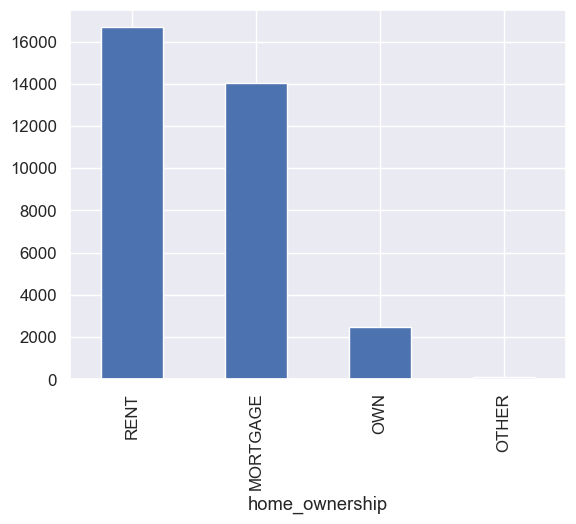

In [266]:
loan_df['home_ownership'].value_counts().plot.bar()

In [267]:
# Majority of loan applicants are either living on Rent or on Mortgage

<Axes: xlabel='purpose'>

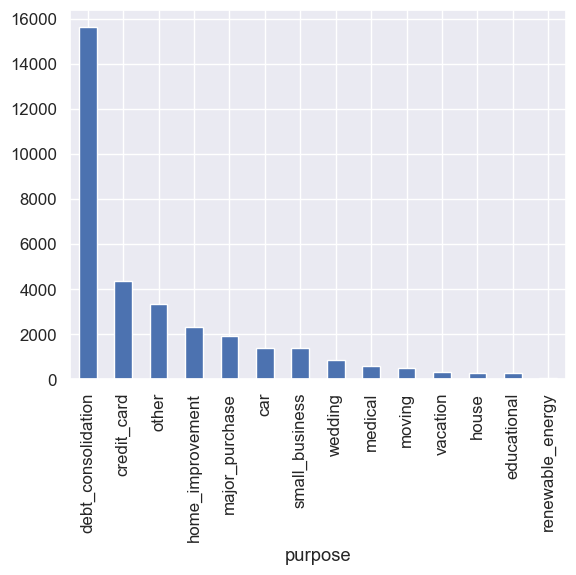

In [268]:
loan_df['purpose'].value_counts().plot.bar()

In [269]:
# Most of the loan applicants are for debt_consolidations.

In [270]:
Failed_per_houseowner_ship=loan_df
Failed_per_houseowner_ship["loan_status"].value_counts()

loan_status
Fully Paid     28544
Charged Off     4728
Name: count, dtype: int64

<Axes: ylabel='count'>

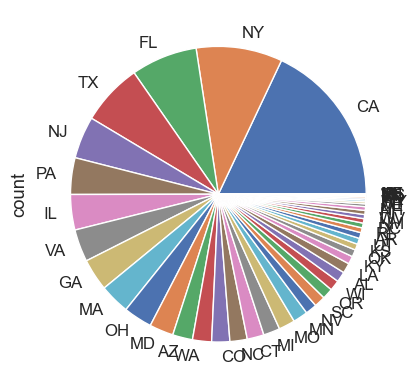

In [271]:
#using Pie plot to visualize
loan_df['addr_state'].value_counts().plot(kind="pie")

In [272]:
# Most of the Loan applicants are from CA(State).

#### 5.3 Ordered Categorical Variable Analysis

<Axes: ylabel='count'>

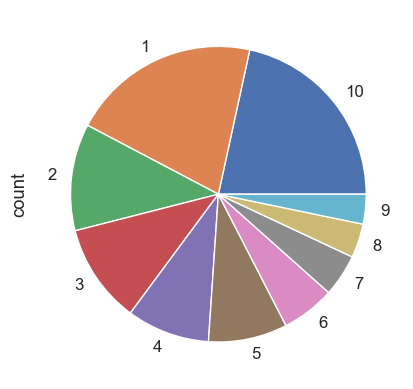

In [273]:
loan_df['emp_length'].value_counts().plot(kind="pie")

In [274]:
# Most of the applications are having 10+ yrs of Exp.

## 6.  Bivariate Analysis

In [275]:
#Bivariate Analysis on annual income against Chargedoff_Proportion -

inc_range_vs_loan = loan_df.groupby(['annual_inc_b', 'loan_status']).loan_status.count().unstack().fillna(0).reset_index()
inc_range_vs_loan['Total'] = inc_range_vs_loan['Charged Off']+ inc_range_vs_loan['Fully Paid']
inc_range_vs_loan['Chargedoff_Proportion'] = inc_range_vs_loan['Charged Off'] / inc_range_vs_loan['Total']
inc_range_vs_loan.sort_values('Chargedoff_Proportion', ascending=False)

loan_status,annual_inc_b,Charged Off,Fully Paid,Total,Chargedoff_Proportion
0,0 - 40k,1570,7326,8896,0.176484
2,50k to 60k,790,4443,5233,0.150965
1,40k - 50k,808,4597,5405,0.149491
3,60k to 70k,489,3267,3756,0.130192
4,70k to 80k,387,2765,3152,0.122779
5,80k - above,684,6146,6830,0.100146


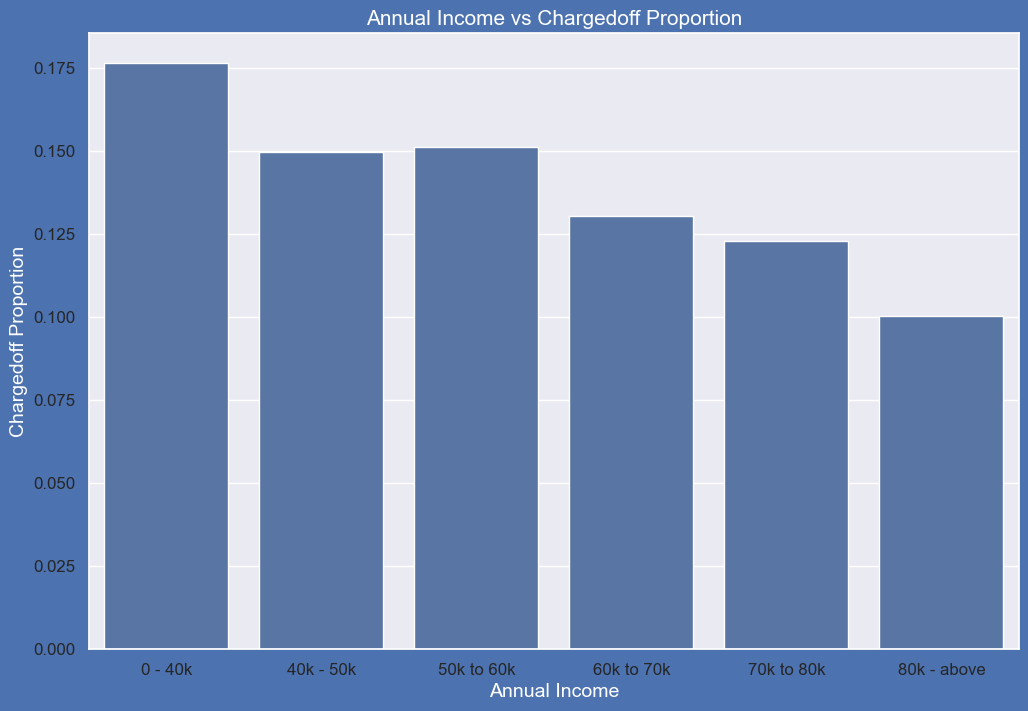

In [276]:
# Lets draw bar plots on data calculated above. Try to visualize the pattern to understand the data better.

fig, ax1 = plot.subplots(figsize=(12, 8),facecolor='b')
ax1.set_title('Annual Income vs Chargedoff Proportion',fontsize=15,color = 'w')
ax1=sea.barplot(x='annual_inc_b', y='Chargedoff_Proportion', data=inc_range_vs_loan)
ax1.set_ylabel('Chargedoff Proportion',fontsize=14,color = 'w')
ax1.set_xlabel('Annual Income',fontsize=14,color='w')
plot.show()
# Observations:
# Income range 80000+  has less chances of charged off.
# Income range 0-20000 has high chances of charged off.
# Notice that with increase in annual income charged off proportion got decreased.

In [277]:
#Bivariate Analysis on Intrest rate  against Chargedoff_Proportion -

interest_vs_loan = loan_df.groupby(['int_rate_b', 'loan_status']).loan_status.count().unstack().fillna(0).reset_index()
interest_vs_loan['Total'] = interest_vs_loan['Charged Off']+ interest_vs_loan['Fully Paid']
interest_vs_loan['Chargedoff_Proportion'] = interest_vs_loan['Charged Off'] / interest_vs_loan['Total']
interest_vs_loan.sort_values('Chargedoff_Proportion', ascending=False)


loan_status,int_rate_b,Charged Off,Fully Paid,Total,Chargedoff_Proportion
3,Very High,1680,4781,6461,0.260022
0,High,987,4860,5847,0.168805
2,Moderate,963,5651,6614,0.145600
1,Low,579,4997,5576,0.103838
4,Very Low,519,8255,8774,0.059152


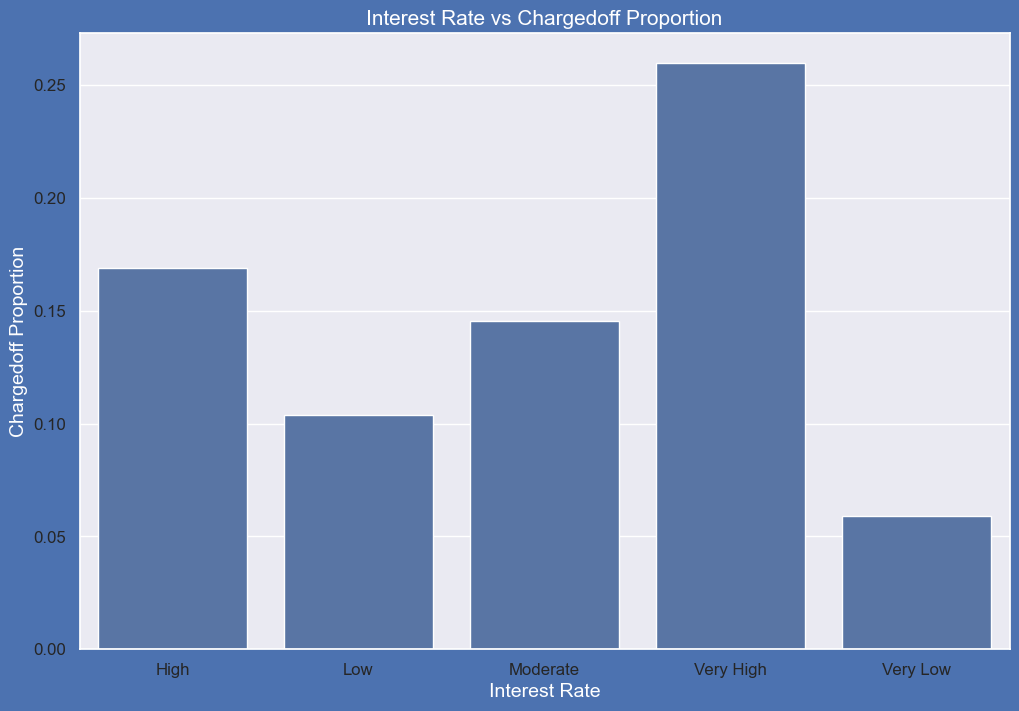

In [278]:
## plot the diagram.
fig, ax1 = plot.subplots(figsize=(12, 8),facecolor='b')
ax1.set_title('Interest Rate vs Chargedoff Proportion',fontsize=15,color='w')
ax1=sea.barplot(x='int_rate_b', y='Chargedoff_Proportion', data=interest_vs_loan)
ax1.set_xlabel('Interest Rate',fontsize=14,color='w')
ax1.set_ylabel('Chargedoff Proportion',fontsize=14,color = 'w')
plot.show()

# Observations:
# interest rate less than 10% or very low has very less chances of charged off. Intrest rates are starting from minimin 5 %.
# interest rate more than 16% or very high has good chnaces of charged off as compared to other category intrest rates.
# Charged off proportion is increasing with higher intrest rates.


Another inference form the houseowner variable those who are not owning the house are most likely to be charged off.

In [279]:
#Bivariate Analysis of Home Ownership against Chargedoff_Proportion -

home_ownership_vs_loan = loan_df.groupby(['home_ownership', 'loan_status']).loan_status.count().unstack().fillna(0).reset_index()
home_ownership_vs_loan['Total'] = home_ownership_vs_loan['Charged Off']+ home_ownership_vs_loan['Fully Paid']
home_ownership_vs_loan['Chargedoff_Proportion'] = home_ownership_vs_loan['Charged Off'] / home_ownership_vs_loan['Total']
home_ownership_vs_loan.sort_values('Chargedoff_Proportion', ascending=False)

loan_status,home_ownership,Charged Off,Fully Paid,Total,Chargedoff_Proportion
1,OTHER,16,73,89,0.179775
3,RENT,2493,14179,16672,0.149532
2,OWN,355,2124,2479,0.143203
0,MORTGAGE,1864,12168,14032,0.132839


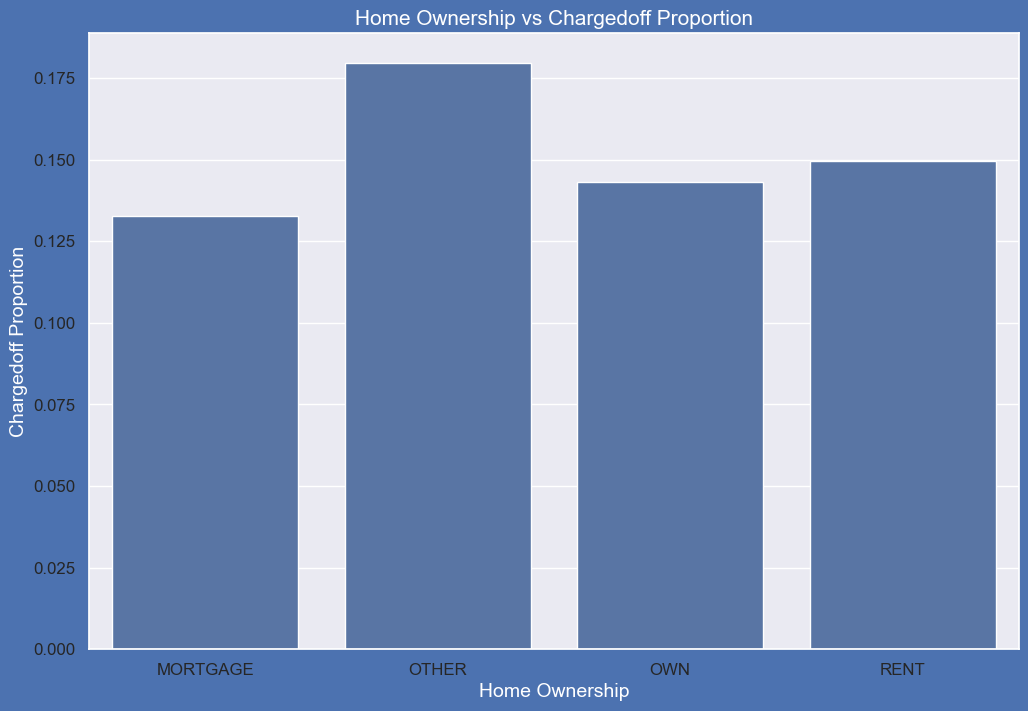

In [280]:

fig, ax1 = plot.subplots(figsize=(12, 8),facecolor='b')
ax1.set_title('Home Ownership vs Chargedoff Proportion',fontsize=15,color='w')
ax1=sea.barplot(x='home_ownership', y='Chargedoff_Proportion', data=home_ownership_vs_loan)
ax1.set_xlabel('Home Ownership',fontsize=14,color='w')
ax1.set_ylabel('Chargedoff Proportion',fontsize=14,color = 'w')
plot.show()

In [281]:
# observation:
# Those who are not owning the home is having high chances of loan defaults.

In [282]:
#Bivariate Analysis on Purpose of loan against Chargedoff_Proportion -

purpose_vs_loan = loan_df.groupby(['purpose', 'loan_status']).loan_status.count().unstack().fillna(0).reset_index()
purpose_vs_loan['Total'] = purpose_vs_loan['Charged Off']+ purpose_vs_loan['Fully Paid']
purpose_vs_loan['Chargedoff_Proportion'] = purpose_vs_loan['Charged Off'] / purpose_vs_loan['Total']
purpose_vs_loan.sort_values('Chargedoff_Proportion', ascending=False)

loan_status,purpose,Charged Off,Fully Paid,Total,Chargedoff_Proportion
11,small_business,368,1007,1375,0.267636
10,renewable_energy,16,67,83,0.192771
5,house,49,249,298,0.164430
3,educational,46,235,281,0.163701
9,other,533,2826,3359,0.158678
7,medical,96,510,606,0.158416
8,moving,79,433,512,0.154297
2,debt_consolidation,2336,13296,15632,0.149437
12,vacation,49,281,330,0.148485
4,home_improvement,278,2030,2308,0.120451


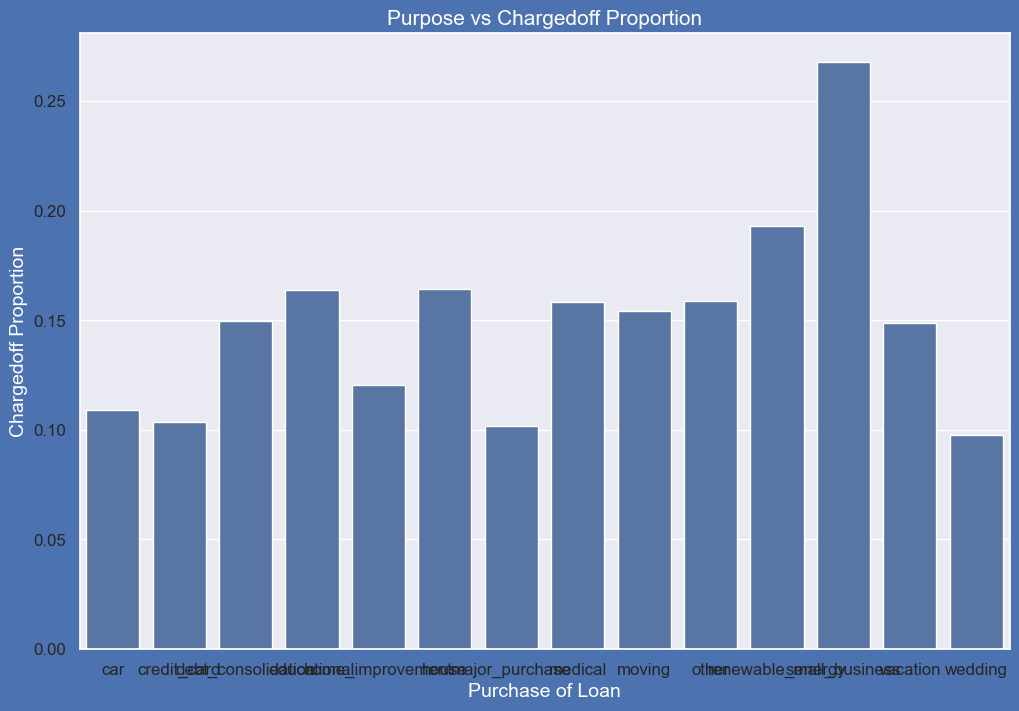

In [283]:
fig, ax1 = plot.subplots(figsize=(12, 8),facecolor='b')
ax1.set_title('Purpose vs Chargedoff Proportion',fontsize=15,color='w')
ax1=sea.barplot(x='purpose', y='Chargedoff_Proportion', data=purpose_vs_loan)
ax1.set_xlabel('Purchase of Loan',fontsize=14,color='w')
ax1.set_ylabel('Chargedoff Proportion',fontsize=14,color = 'w')
plot.show()

In [284]:
#1. Those applicants who is having home loan is having low chances of loan defaults.
#2. Those applicants having loan for small bussiness is having high chances for loan defaults.

In [285]:
#Bivariate Analysis on DTI against Chargedoff_Proportion -

dti_vs_loan = loan_df.groupby(['dti_b', 'loan_status']).loan_status.count().unstack().fillna(0).reset_index()
dti_vs_loan['Total'] = dti_vs_loan['Charged Off']+ dti_vs_loan['Fully Paid']
dti_vs_loan['Chargedoff_Proportion'] = dti_vs_loan['Charged Off'] / dti_vs_loan['Total']
dti_vs_loan.sort_values('Chargedoff_Proportion', ascending=False)

loan_status,dti_b,Charged Off,Fully Paid,Total,Chargedoff_Proportion
3,Very High,1045,5404,6449,0.162041
0,High,951,5122,6073,0.156595
2,Moderate,986,5806,6792,0.145171
1,Low,797,5347,6144,0.129720
4,Very Low,949,6865,7814,0.121449


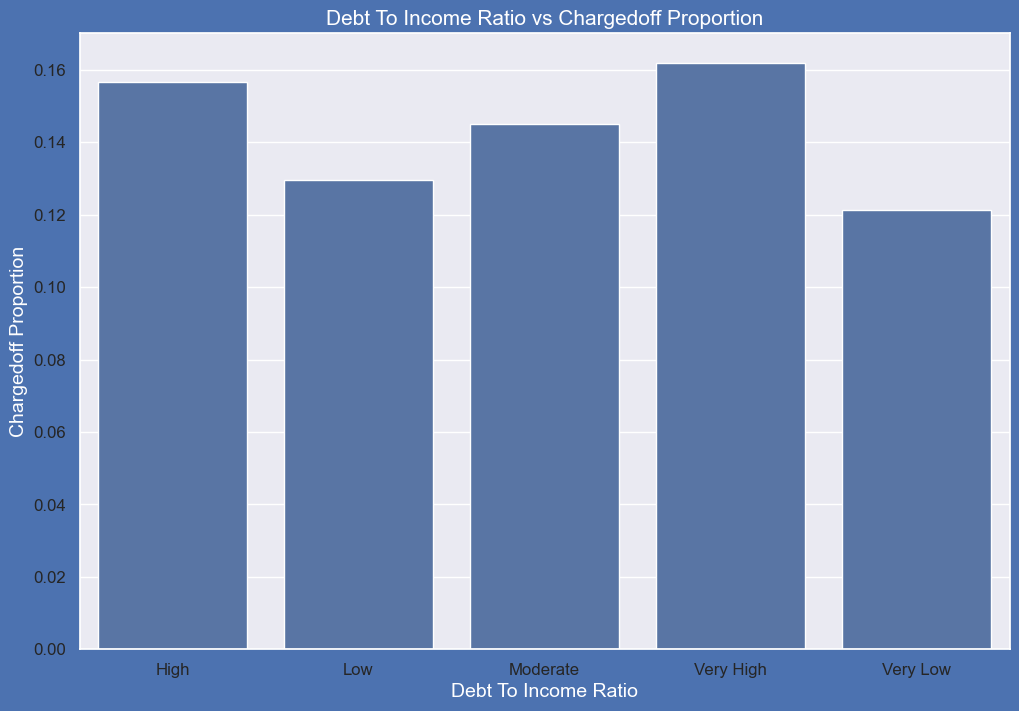

In [286]:
fig, ax1 = plot.subplots(figsize=(12, 8),facecolor='b')
ax1.set_title('Debt To Income Ratio vs Chargedoff Proportion',fontsize=15,color='w')
ax1=sea.barplot(x='dti_b', y='Chargedoff_Proportion', data=dti_vs_loan)
ax1.set_xlabel('Debt To Income Ratio',fontsize=14,color='w')
ax1.set_ylabel('Chargedoff Proportion',fontsize=14,color = 'w')
plot.show()

In [287]:
# Observation:
#1.High DTI value  having high risk of defaults
# 2 Lower the DTO having low chances loan defaults.

In [288]:
loan_df['pub_rec_bankruptcies'].value_counts()

pub_rec_bankruptcies
0.0    31820
1.0     1447
2.0        5
Name: count, dtype: int64

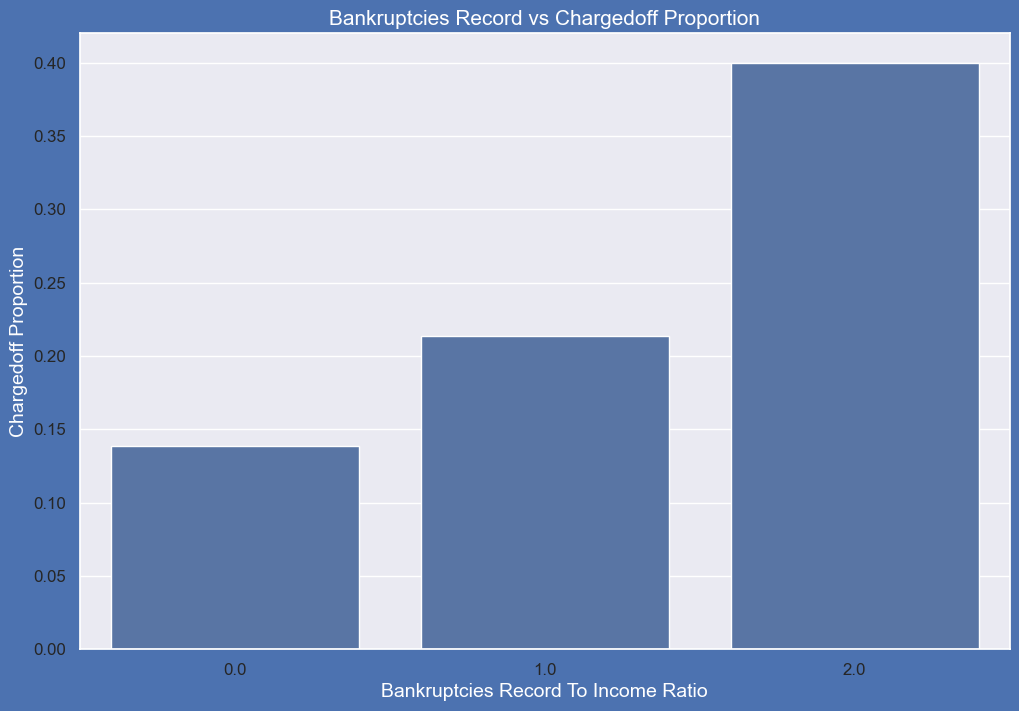

In [289]:
# #Bivariate Analysis on Bankruptcies Record against Chargedoff_Proportion -
pub_rec_bankruptcies_vs_loan = loan_df.groupby(['pub_rec_bankruptcies', 'loan_status']).loan_status.count().unstack().fillna(0).reset_index()
pub_rec_bankruptcies_vs_loan['Total'] = pub_rec_bankruptcies_vs_loan['Charged Off']+ pub_rec_bankruptcies_vs_loan['Fully Paid']
pub_rec_bankruptcies_vs_loan['Chargedoff_Proportion'] = pub_rec_bankruptcies_vs_loan['Charged Off'] / pub_rec_bankruptcies_vs_loan['Total']
pub_rec_bankruptcies_vs_loan.sort_values('Chargedoff_Proportion', ascending=False)


# graph
fig, ax1 = plot.subplots(figsize=(12, 8),facecolor='b')
ax1.set_title('Bankruptcies Record vs Chargedoff Proportion',fontsize=15,color='w')
ax1=sea.barplot(x='pub_rec_bankruptcies', y='Chargedoff_Proportion', data=pub_rec_bankruptcies_vs_loan)
ax1.set_xlabel('Bankruptcies Record To Income Ratio',fontsize=14,color='w')
ax1.set_ylabel('Chargedoff Proportion',fontsize=14,color = 'w')
plot.show()

In [290]:
# Observations:
#1.Bankruptcies Record with 2 is having high impact on loan defaults
# 2.Bankruptcies Record with 0 is low impact on loan defaults
# 3.Lower the Bankruptcies lower the risk.

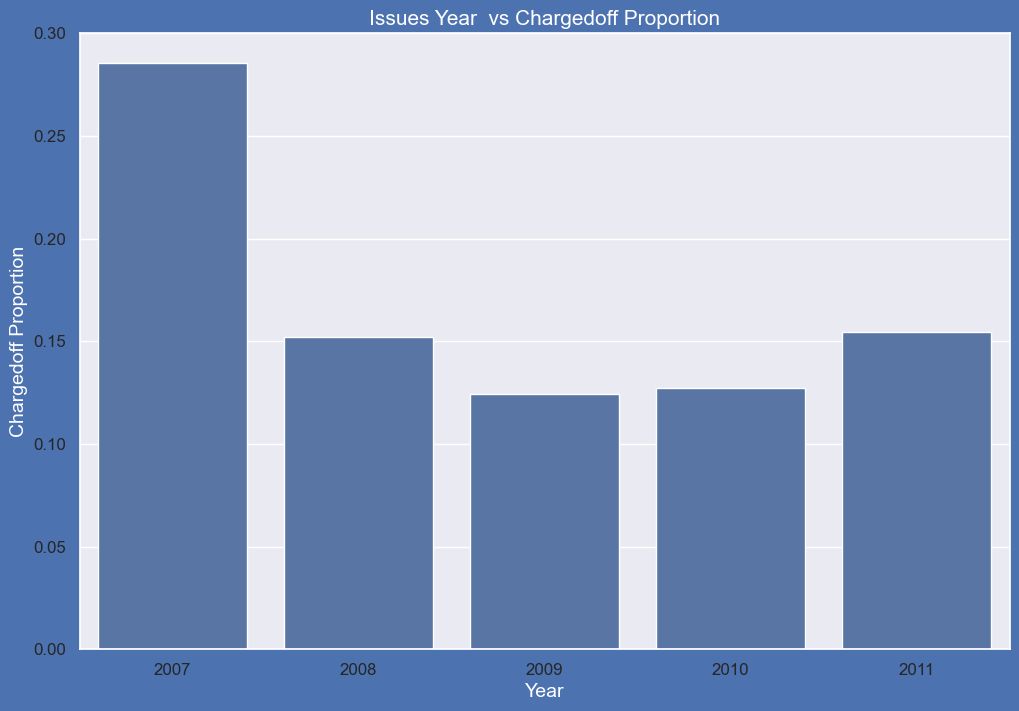

In [291]:
# #Bivariate Analysis on Issues of Year  against Chargedoff_Proportion -

issue_year_vs_loan = loan_df.groupby(['issue_year', 'loan_status']).loan_status.count().unstack().fillna(0).reset_index()
issue_year_vs_loan['Total'] = issue_year_vs_loan['Charged Off']+ issue_year_vs_loan['Fully Paid']
issue_year_vs_loan['Chargedoff_Proportion'] = issue_year_vs_loan['Charged Off'] / issue_year_vs_loan['Total']
issue_year_vs_loan.sort_values('Chargedoff_Proportion', ascending=False)


# graph
fig, ax1 = plot.subplots(figsize=(12, 8),facecolor='b')
ax1.set_title('Issues Year  vs Chargedoff Proportion',fontsize=15,color='w')
ax1=sea.barplot(x='issue_year', y='Chargedoff_Proportion', data=issue_year_vs_loan)
ax1.set_xlabel('Year',fontsize=14,color='w')
ax1.set_ylabel('Chargedoff Proportion',fontsize=14,color = 'w')
plot.show()

In [292]:
    # Year 2007 is highest loan defaults.
    # 2009 is having lowest loan defaults.


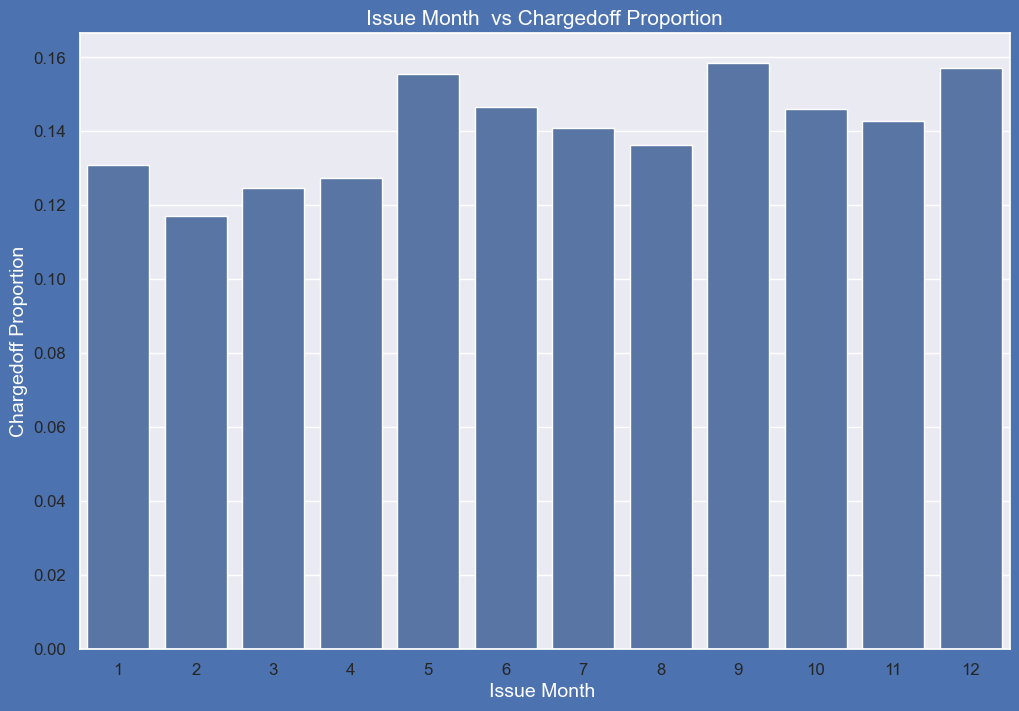

In [293]:
# #Bivariate Analysis on Month of Issue of loan Record against Chargedoff_Proportion -

issue_month_vs_loan = loan_df.groupby(['issue_month', 'loan_status']).loan_status.count().unstack().fillna(0).reset_index()
issue_month_vs_loan['Total'] = issue_month_vs_loan['Charged Off']+ issue_month_vs_loan['Fully Paid']
issue_month_vs_loan['Chargedoff_Proportion'] = issue_month_vs_loan['Charged Off'] / issue_month_vs_loan['Total']
issue_month_vs_loan.sort_values('Chargedoff_Proportion', ascending=False)


# graph
fig, ax1 = plot.subplots(figsize=(12, 8),facecolor='b')
ax1.set_title('Issue Month  vs Chargedoff Proportion',fontsize=15,color='w')
ax1=sea.barplot(x='issue_month', y='Chargedoff_Proportion', data=issue_month_vs_loan)
ax1.set_xlabel('Issue Month ',fontsize=14,color='w')
ax1.set_ylabel('Chargedoff Proportion',fontsize=14,color = 'w')
plot.show()

In [294]:
# 1. Those loan has been issued in May, September and december is having high number of loan defaults
# 2. Those loan has been issued in month of February is having high number of loan defaults
#3. Majority of loan defaults comig from applicants whose loan has been aprroved from September-to Deceber

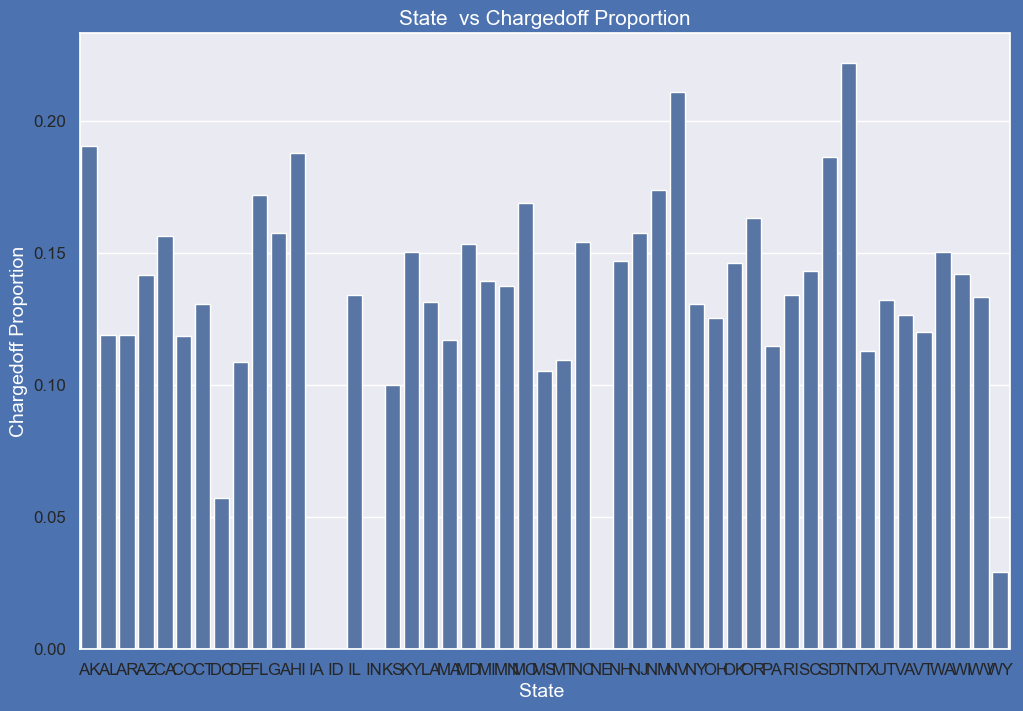

In [295]:
# #Bivariate Analysis on Address state  against Chargedoff_Proportion -

addr_state_vs_loan = loan_df.groupby(['addr_state', 'loan_status']).loan_status.count().unstack().fillna(0).reset_index()
addr_state_vs_loan['Total'] = addr_state_vs_loan['Charged Off']+ addr_state_vs_loan['Fully Paid']
addr_state_vs_loan['Chargedoff_Proportion'] = addr_state_vs_loan['Charged Off'] / addr_state_vs_loan['Total']
addr_state_vs_loan.sort_values('Chargedoff_Proportion', ascending=False)

# graph
fig, ax1 = plot.subplots(figsize=(12, 8),facecolor='b')
ax1.set_title('State  vs Chargedoff Proportion',fontsize=15,color='w')
ax1=sea.barplot(x='addr_state', y='Chargedoff_Proportion', data=addr_state_vs_loan)
ax1.set_xlabel('State ',fontsize=14,color='w')
ax1.set_ylabel('Chargedoff Proportion',fontsize=14,color = 'w')
plot.show()

In [296]:
# Observations:
# 1.DE States is holding highest number of loan defaults.
# 2.CA is having low number of loan defaults

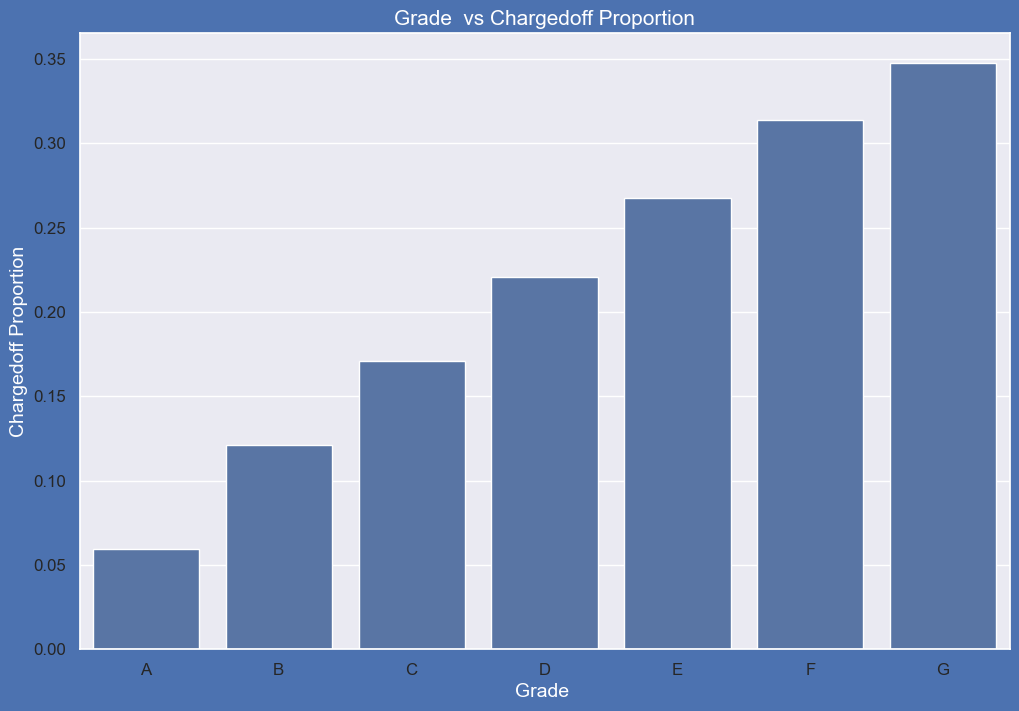

In [297]:
# #Bivariate Analysis on Grade against Chargedoff_Proportion -

grade_vs_loan = loan_df.groupby(['grade', 'loan_status']).loan_status.count().unstack().fillna(0).reset_index()
grade_vs_loan['Total'] = grade_vs_loan['Charged Off']+ grade_vs_loan['Fully Paid']
grade_vs_loan['Chargedoff_Proportion'] = grade_vs_loan['Charged Off'] / grade_vs_loan['Total']
grade_vs_loan.sort_values('Chargedoff_Proportion', ascending=False)


# graph
fig, ax1 = plot.subplots(figsize=(12, 8),facecolor='b')
ax1.set_title('Grade  vs Chargedoff Proportion',fontsize=15,color='w')
ax1=sea.barplot(x='grade', y='Chargedoff_Proportion', data=grade_vs_loan)
ax1.set_xlabel('Grade ',fontsize=14,color='w')
ax1.set_ylabel('Chargedoff Proportion',fontsize=14,color = 'w')
plot.show()

In [298]:
    # observations :
    #1. The Loan applicants with loan Grade G is having higest Loan Defaults.
    #2. The Loan applicants with loan A is having lowest Loan Defaults.

## 7.  Correlation Analysis

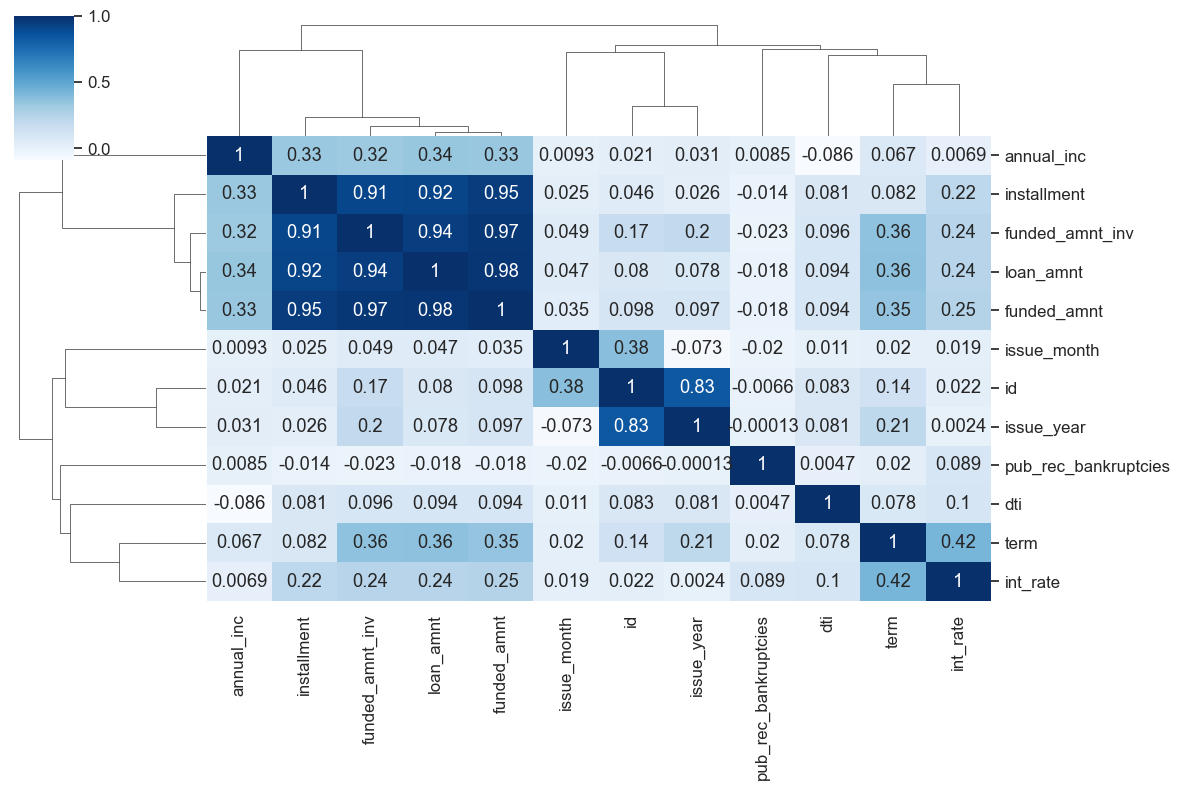

In [299]:

corr_loan = loan_df.select_dtypes(include=[float, int])
corr = corr_loan.corr()

sea.set(font_scale=1.1)
sea.clustermap(corr, annot=True, figsize=(12, 8), cmap="Blues")
plot.show()


In [300]:
drop_columns = ['installment', 'id', 'issue_year', 'issue_month']
corr_loan = corr_loan.drop(columns=drop_columns)

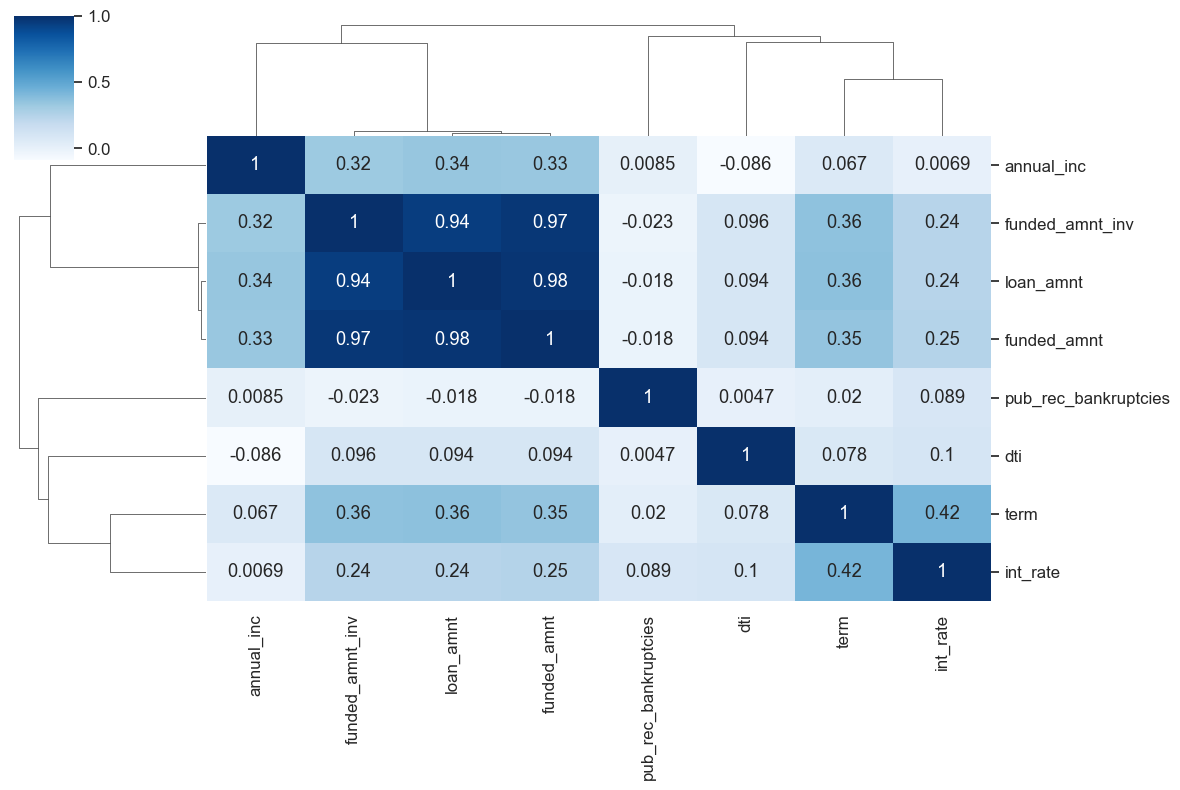

In [301]:
corr = corr_loan.corr()
sea.set(font_scale=1.1)
sea.clustermap(corr, annot=True, figsize=(12, 8), cmap="Blues")
plot.show()

Negative Correlation:

1.loan_amnt has negative correlation with pub_rec_bankrupticies

2.annual income has a negative correlation with dti

Strong Correlation:

1.term has a strong correlation with loan amount

2.term has a strong correlation with interest rate

3.annual income has a strong correlation with loan_amount

<Axes: xlabel='term', ylabel='loan_amnt'>

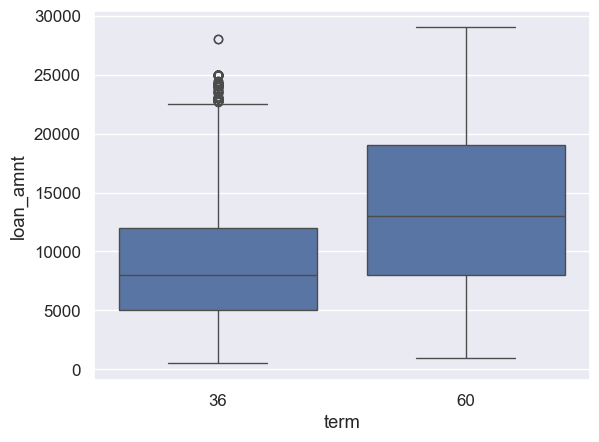

In [302]:
sea.boxplot(x = 'term', y = 'loan_amnt', data=corr_loan)

from the above graph we can see that if term is increasing loan amount is also increasing

<Axes: xlabel='term', ylabel='int_rate'>

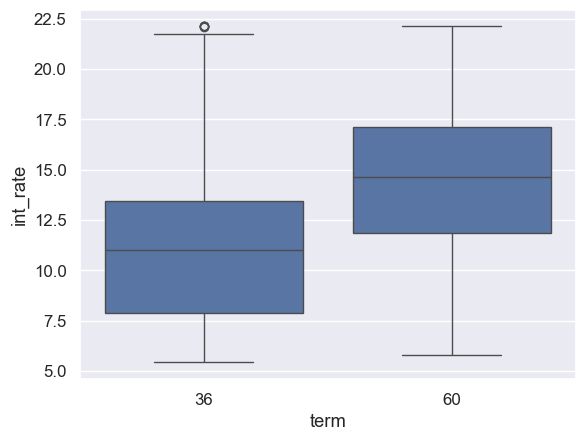

In [303]:
sea.boxplot(x = 'term', y = 'int_rate', data=corr_loan)